<div style="background-color: #c1f2a5">


# Part 1
In Part 1 of the problem set, you will manipulate some basic numpy functions and practice plotting again.

## Instructions



Remember to do your problem set in Python 3. Fill in `#YOUR CODE HERE`.

Make sure: 
- all plots are scaled in a way so that you can see what is going on 
- that the general patterns are fairly represented. 
- to label all x and y axes, and to include a title.
    
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Q1 [5pts,  HELP]
Plot $y(x)=sin(2^x)$ for $x \in [-5, 8]$, with $x$ sampled in increments of $0.01$.

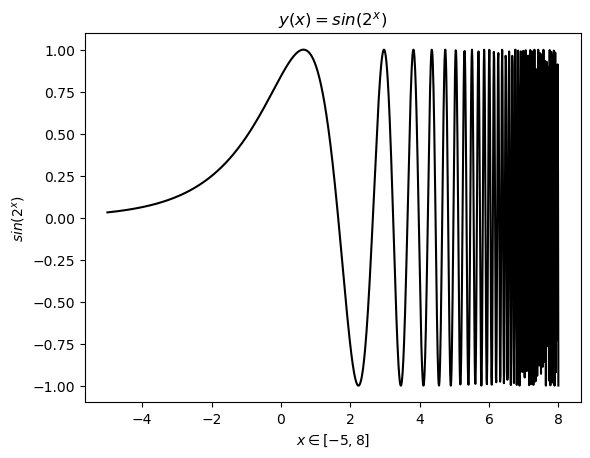

In [2]:
#YOUR CODE HERE
x = np.arange(-5, 8.01, 0.01)
y = np.sin(2**x)

figure, axis = plt.subplots()

#YOUR CODE HERE
plt.plot(x, y, color='black')
plt.xlabel('$x \in [-5, 8]$')
plt.ylabel('$sin(2^x)$')
plt.title('$y(x)=sin(2^x)$')

figure.savefig('PS1_Q1.png')

## Q2 [5pts, SOLO]
Using $y(x)$ from the previous question, plot $g(x)=y(x)/y(x+1)$, with the same range of x values as Q1.

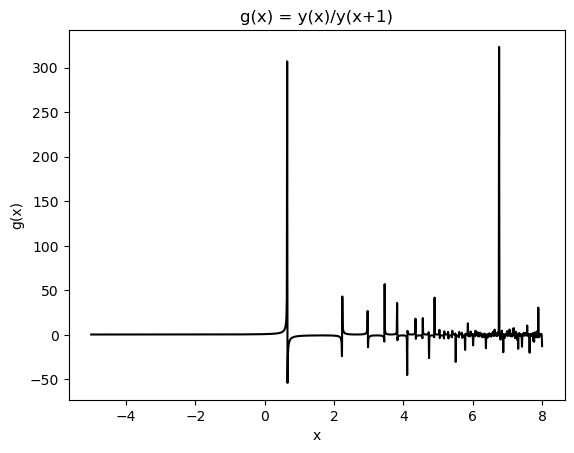

In [3]:
#YOUR CODE HERE
g = y / np.sin(2**(x+1))

figure, axis = plt.subplots()

#YOUR CODE HERE
plt.plot(x, g, color='black')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.title('g(x) = y(x)/y(x+1)')

figure.savefig('PS1_Q2.png')

## Q3.1 [5pts, HELP]

Write a function that computes $f(n)=\sum_{i=1}^n 1/(i+1)$. Copy your answer into Gradescope's 3.1 field.

In [4]:
#YOUR CODE HERE
def func(n):
    sum = 0
    for i in np.arange(1, n+1):
        sum += 1/(i+1)
        
    return sum

## Q3.2 [5pts, SOLO]
Plot function $f(n)$ for all integers from $n=1$ to $100$.


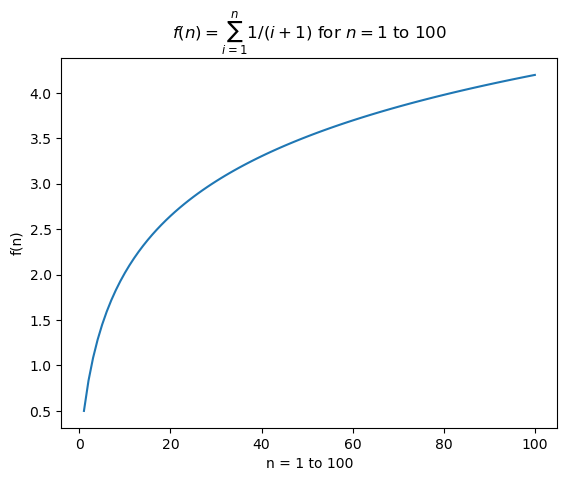

In [5]:
#YOUR CODE HERE
n = np.arange(1,101)
f = [func(i) for i in n]

figure, axis = plt.subplots()

#YOUR CODE HERE
plt.plot(n,f)
plt.xlabel('n = 1 to 100')
plt.ylabel('f(n)')
plt.title('$f(n)=\sum_{i=1}^n 1/(i+1)$ for $n = 1$ to $100$')

figure.savefig('PS1_Q3_2.png') 

## Q4 [5pts, HELP]
Plot a histogram of $sin(x)$ where $x$ is chosen from a standard normal distribution (mean = 0, sd = 1). Draw 10,000 samples to make the histogram.

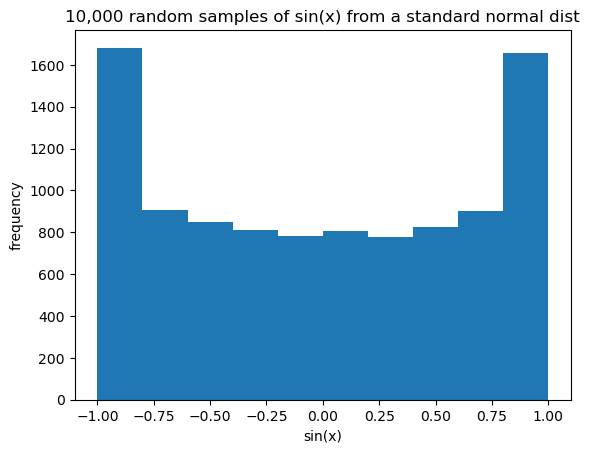

In [6]:
#YOUR CODE HERE
x = np.random.normal(size=10000)

y = np.sin(x)

figure, axis = plt.subplots()

#YOUR CODE HERE
plt.hist(y)
plt.xlabel('sin(x)')
plt.ylabel('frequency')
plt.title('10,000 random samples of sin(x) from a standard normal dist')
figure.savefig('PS1_Q4.png') 


## Q5 [5pts, SOLO]
Plot a histogram of $exp(x)$ where $x$ is chosen from a *uniform* distribution in $[0,1.5]$. Draw 10,000 samples to make the histogram.

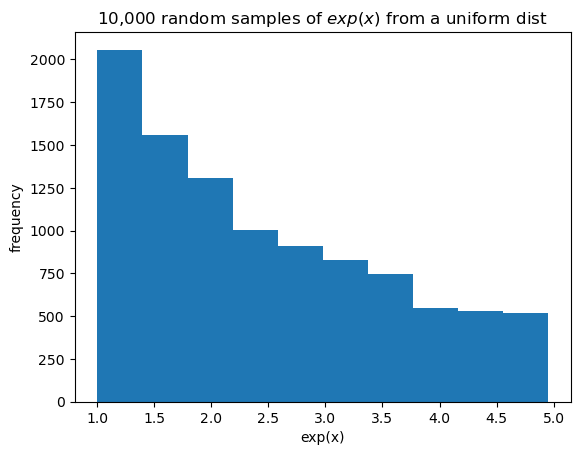

In [7]:
#YOUR CODE HERE
x = np.random.uniform(low=0.0, high=1.6, size=10000)
y = np.exp(x)

figure, axis = plt.subplots()

#YOUR CODE HERE
plt.hist(y)
plt.xlabel('exp(x)')
plt.ylabel('frequency')
plt.title('10,000 random samples of $exp(x)$ from a uniform dist')

figure.savefig('PS1_Q5.png') 

## Q6.1 [5pts, HELP]
Create a numpy array of 1000 random samples from a standard normal distribution (mean = 0, standard deviation = 1). Sort the samples, and plot a histogram of the differences between the adjacent sorted elements (the difference between the first and the second, second and the third, third and the fourth, etc.). You may not use the numpy.diff function (please write this part yourself). You can use the built-in sorting function.

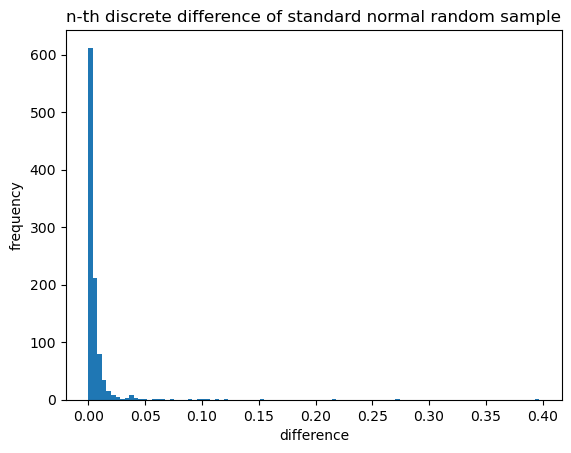

In [8]:
#YOUR CODE HERE
x = np.sort(np.random.normal(size=1000))
diff = [x[i+1] - x[i] for i in np.arange(999)]

figure, axis = plt.subplots()

#YOUR CODE HERE
plt.hist(diff, bins=100)
plt.xlabel('difference')
plt.ylabel('frequency')
plt.title('n-th discrete difference of standard normal random sample')


figure.savefig('PS1_Q6_1.png')

## Q6.2  [5pts, SOLO]
Plot the difference computed in 6.1 against its index


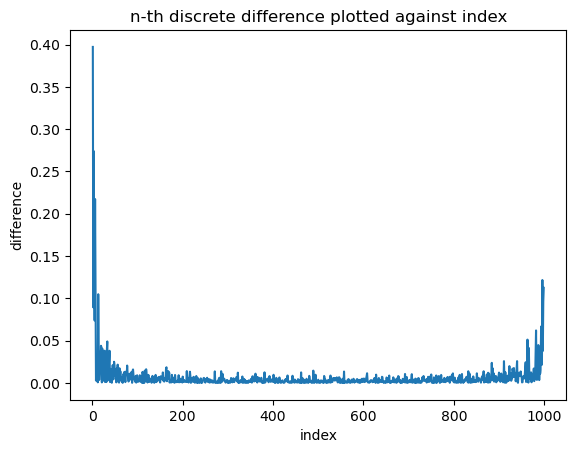

In [9]:
#YOUR CODE HERE
index = np.arange(1,1000)

figure, axis = plt.subplots()

#YOUR CODE HERE
plt.plot(index, diff)
plt.xlabel('index')
plt.ylabel('difference')
plt.title('n-th discrete difference plotted against index')

figure.savefig('PS1_Q6_2.png') 

<div style="background-color: #c1f2a5">


# Part 2

In this problem set, you will program a Rescorla-Wagner model and see how it captures some conditioning phenomena.

## Instructions

Remember to do your problem set in Python 3. Fill in `#YOUR CODE HERE`.

Make sure: 
- that all plots are scaled in such a way that you can see what is going on 
- that the general patterns are fairly represented.
- to label all x- and y-axes, and to include a title.

</div>

**In all of the questions below, please use $\alpha_{light}=0.5$, $\beta=0.1$, $V_0=0$ *unless* otherwise specified.**</span> 

Go over Lecture 3 if you don't know what these parameters mean.

## Q7.1 [10pts, HELP] 
Suppose that we repeatedly pair a light with food. Plot the association strength between light and food according to the Rescorla-Wagner model with an initial association $V_0 = 0.05$ and an initial association of $V_0 = 0.5$ (as two separate curves on the same plot). You can assume the strength of an observation $r = 1$. Plot 20 trials. Be sure to include a legend for the two different values of $V_0$.

In [10]:
def rescorla_wagner(trials, r, alpha=0.5, beta=0.1, v0=0):
    V = np.empty(trials+1)
    V[0] = v0
    for i in range(trials):
        V[i+1] = V[i] + (beta * alpha * (r - V[i]))
    return V

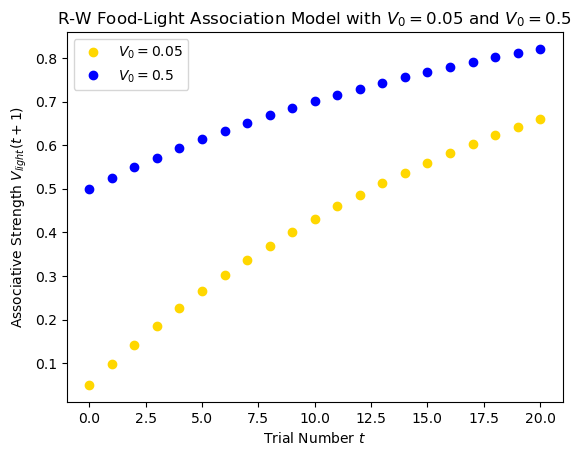

In [11]:
#YOUR CODE HERE
strong = rescorla_wagner(20, 1, v0=0.5)
weak = rescorla_wagner(20, 1, v0=0.05)

figure, axis = plt.subplots()

#YOUR CODE HERE
axis.plot(weak, 'o', color='gold', label = '$V_0 = 0.05$')
axis.plot(strong, 'o', color='blue', label = '$V_0 = 0.5$')
plt.xlabel('Trial Number $t$')
plt.ylabel('Associative Strength $V_{light}(t+1)$')
plt.title('R-W Food-Light Association Model with $V_0=0.05$ and $V_0=0.5$')
axis.legend()

figure.savefig('PS1_Q7_1.png')

## Q7.2. [3pts, SOLO] 
How many trials will it take to reach $V_{light} = 0.8$ if the initial association is $V_0 = 0.05$? Plot the association strength for this number of trials. (Hint: you may want to use a "while" loop in this problem.)

0.8062885155414988 32


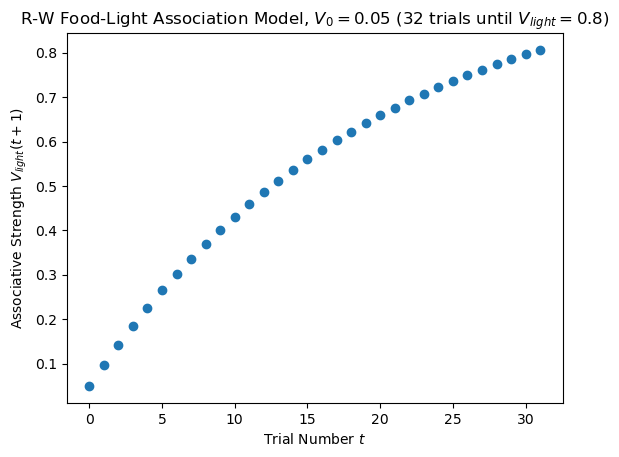

In [12]:
#YOUR CODE HERE
trials = 1
V_light = 0
V0 = 0.05
V = []

while V_light <= 0.8:
    V = rescorla_wagner(trials, 1, v0=V0)
    V_light = V[trials]
    trials += 1

figure, axis = plt.subplots()

#YOUR CODE HERE
axis.plot(V, 'o')
plt.xlabel('Trial Number $t$')
plt.ylabel('Associative Strength $V_{light}(t+1)$')
plt.title('R-W Food-Light Association Model, $V_0=0.05$ (32 trials until $V_{light} = 0.8$)')

figure.savefig('PS1_Q7_2.png')
print(V[trials-1], trials)

## Q7.3. [5pts, SOLO] 
Suppose that starting from an initial association of $V_0 = 0.0$, it takes a 16 trials for the association between a light and food to exceed $0.8$, what is the salience (i.e., the $\alpha$ parameter)? It is acceptable to solve this question numerically. Please copy your code into Gradescope.

In [13]:
#YOUR CODE HERE
trials = 16
a = 0
V_light = 0
V0 = 0
V = []

while V_light <= 0.8:
    V = rescorla_wagner(trials, 1, alpha=a, v0=V0)
    V_light = V[trials]
    a += 0.001

print('V_light =', V_light)
print('alpha parameter =', a)

V_light = 0.8000135858059723
alpha parameter = 0.9580000000000007


## Q8. [10pts, SOLO] 
Suppose that you begin with an association between a light and food of $0.8$. Now, you want to teach a new association between a bell and food while the light is present (thus you pair light, food, bell all together). Plot the association strength between bell and food as a function of the number of trials when $\alpha_{bell}=0.2$. Plot 30 trials.

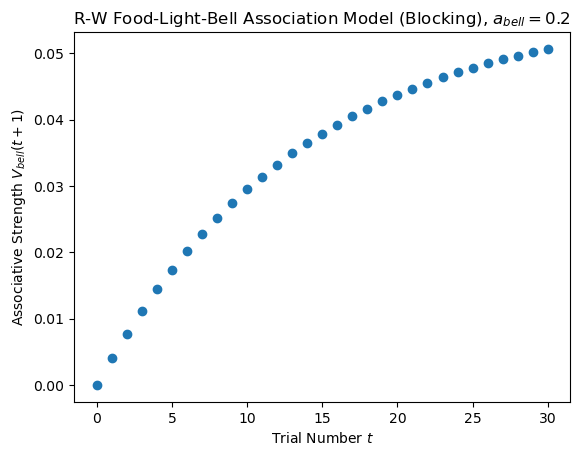

In [14]:
#YOUR CODE HERE
def rw_bell_light(trials, r=1, beta=0.1, v0_light=0.8, v0_bell=0, a_light=0.5, a_bell=0.2):
    V_light = np.empty(trials+1)
    V_bell = np.empty(trials+1)
    V_light[0] = v0_light
    V_bell[0] = v0_bell
    
    for i in range(trials):
        V_light[i+1] = V_light[i] + (beta * a_light * (r - V_light[i] - V_bell[i]))
        V_bell[i+1] = V_bell[i] + (beta * a_bell * (r - V_light[i] - V_bell[i]))
    return V_bell

trials = 30
rw_bell = rw_bell_light(trials)

figure, axis = plt.subplots()

#YOUR CODE HERE
plt.plot(rw_bell, 'o')
plt.xlabel('Trial Number $t$')
plt.ylabel('Associative Strength $V_{bell}(t+1)$')
plt.title('R-W Food-Light-Bell Association Model (Blocking), $a_{bell} = 0.2$')

figure.savefig('PS1_Q8.png')

## Q9.1. [10pts, HELP] 
Suppose that you repeatedly alternate trials such that a bell is paired with food on one trial and no food on the next. What will the association strength be if you keep doing this for a long time? Make a plot (50 trials) of what will happen and provide an intuitive explanation for why that may be the case in Gradescope. Use the same $\alpha_{bell} = 0.2$. 

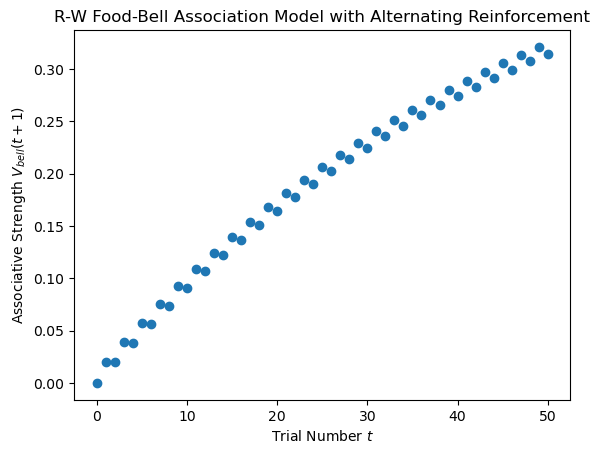

In [15]:
#YOUR CODE HERE
def rescorla_wagner_bell(trials, r=1, alpha=0.2, beta=0.1, v0=0):
    V = np.empty(trials+1)
    V[0] = v0
    for i in range(trials):
        V[i+1] = V[i] + (beta * alpha * (r - V[i]))
        r = 1 - r
    return V

trials = 50
rw_bell_flip = rescorla_wagner_bell(trials)

figure, axis = plt.subplots()

#YOUR CODE HERE
plt.plot(rw_bell_flip, 'o')
plt.xlabel('Trial Number $t$')
plt.ylabel('Associative Strength $V_{bell}(t+1)$')
plt.title('R-W Food-Bell Association Model with Alternating Reinforcement')

figure.savefig('PS1_Q9_1.png')

## Q9.2. [5pts, SOLO] 

Suppose that, on a given trial, you pair a bell with food with probability $P$ and no food with probability $1-P$. What will the association strength be after many trials of this? Explain in 2-3 sentences in Gradescope.

In the same figure, plot three examples in three subplots. Use 100 trials for all examples and $P = 0.2, 0.6, 0.8$ for each example, respectively. Make sure to indicate the value of $P$ in the corresponding subplot title.

Format your subplots as 3 rows, 1 column. Please use an overall figure size of (7,15) for the total figure object.

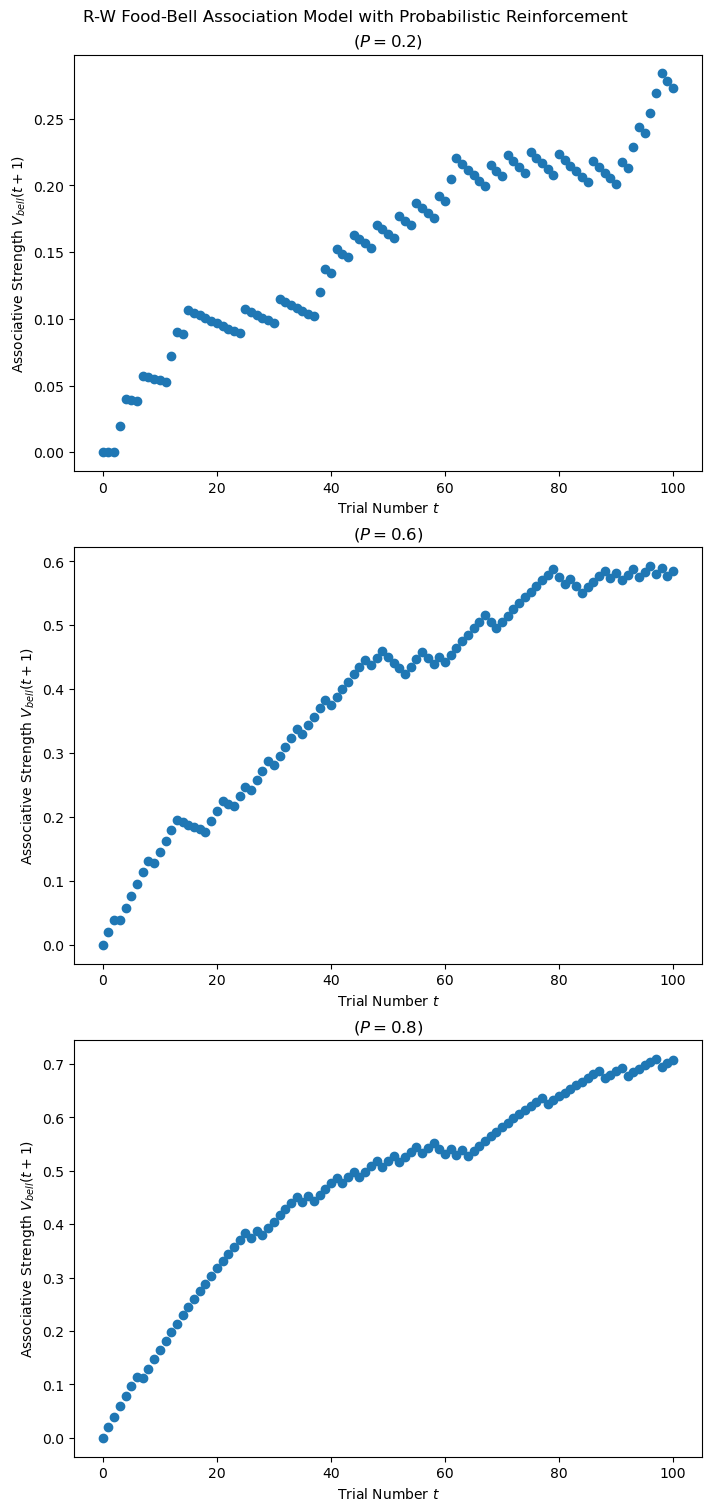

In [16]:
#YOUR CODE HERE
def rescorla_wagner_prob(trials, p, alpha=0.2, beta=0.1, v0=0):
    V = np.empty(trials+1)
    V[0] = v0
    R = np.random.choice(2, trials, p=[1-p, p])
    for i in range(trials):
        V[i+1] = V[i] + (beta * alpha * (R[i] - V[i]))
    return V

trials = 100
first_rw = rescorla_wagner_prob(trials, 0.2)
second_rw = rescorla_wagner_prob(trials, 0.6)
third_rw = rescorla_wagner_prob(trials, 0.8)

figure, axis = plt.subplots(nrows=3, ncols=1, constrained_layout=True, figsize=(7,15)) # EDIT THIS CODE

#YOUR CODE HERE
figure.suptitle('R-W Food-Bell Association Model with Probabilistic Reinforcement')
axis[0].plot(first_rw, 'o')#YOUR CODE HERE
axis[0].set_title('$(P=0.2)$')
axis[1].plot(second_rw, 'o')
axis[1].set_title('$(P=0.6)$')
axis[2].plot(third_rw, 'o')
axis[2].set_title('$(P=0.8)$')
#YOUR CODE HERE

axis[0].set_xlabel('Trial Number $t$')
axis[0].set_ylabel('Associative Strength $V_{bell}(t+1)$')
axis[1].set_xlabel('Trial Number $t$')
axis[1].set_ylabel('Associative Strength $V_{bell}(t+1)$')
axis[2].set_xlabel('Trial Number $t$')
axis[2].set_ylabel('Associative Strength $V_{bell}(t+1)$')

figure.savefig('PS1_Q9_2.png')

<div style="background-color: #c1f2a5">

# Submission

    
When you're done with your problem set, do the following:
- Upload your answers in Gradescope's PS1.
- Convert your Jupyter Notebook into a `.py` file by doing so:    
    
</div>


<center>    
  <img src="https://www.dropbox.com/s/7s189m4dsvu5j65/instruction.png?dl=1" width="300"/>
</center>

<div style="background-color: #c1f2a5">
    
- Submit the `.py` file you just created in Gradescope's PS1-code.
    
</div>        




</div>
